<a href="https://www.kaggle.com/code/sjagkoo7/policy-prediction-am?scriptVersionId=150346908" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction
Design a prediction model if a customer having income more than 50000 dollar then need to advise for ploicy. This prediction will help team to take decisions for providing the financial assistance for low income group customers.

# Importing Dataset

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


/kaggle/input/policy/train.csv
/kaggle/input/policy/test.csv


# Reading the Dataset

In [2]:
tr_data=pd.read_csv('/kaggle/input/policy/train.csv')
ts_data=pd.read_csv('/kaggle/input/policy/test.csv')

# Data Pre-Processing

In [3]:
#Reading training data
tr_data.head()
#reading test data
#ts_data.head()

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   67    Private  366425     Doctorate               16            Divorced   
1   17    Private  244602          12th                8       Never-married   
2   31    Private  174201     Bachelors               13  Married-civ-spouse   
3   58  State-gov  110199       7th-8th                4  Married-civ-spouse   
4   25  State-gov  149248  Some-college               10       Never-married   

         occupation   relationship   race gender  capital-gain  capital-loss  \
0   Exec-managerial  Not-in-family  White   Male         99999             0   
1     Other-service      Own-child  White   Male             0             0   
2   Exec-managerial        Husband  White   Male             0             0   
3  Transport-moving        Husband  White   Male             0             0   
4     Other-service  Not-in-family  Black   Male             0             0   

   hours-per-week native-country  income_>50K  
0              60  United-States            1  
1              15  United-States            0  
2              40  United-States            1  
3              40  United-States            0  
4              40  United-States            0

In [4]:
tr_data.describe()

age        fnlwgt  educational-num  capital-gain  \
count  43957.000000  4.395700e+04     43957.000000  43957.000000   
mean      38.617149  1.896730e+05        10.074118   1093.559797   
std       13.734401  1.058215e+05         2.575092   7570.536063   
min       17.000000  1.349200e+04         1.000000      0.000000   
25%       28.000000  1.174960e+05         9.000000      0.000000   
50%       37.000000  1.781000e+05        10.000000      0.000000   
75%       48.000000  2.376710e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week   income_>50K  
count  43957.000000    43957.000000  43957.000000  
mean      88.246491       40.407694      0.239279  
std      404.588410       12.400303      0.426648  
min        0.000000        1.000000      0.000000  
25%        0.000000       40.000000      0.000000  
50%        0.000000       40.000000      0.000000  
75%        0.000000       45.000000      0.000000  
max     4356.000000       99.000000      1.000000

In [5]:
tr_data.info()
#ts_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


In [6]:
#tr_data.size #total element present in dataset
#tr_data.shape #rows & columns present in dataset
#len(tr_data) #no of rows in dataset
#len(tr_data.columns) #no of columns in dataset
tr_data.isna().sum()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

In [7]:
tr_data.profile_report(title='Customer Report',progress_bar=False)

In [8]:
#['age', 'workclass', 'fnlwgt', 'education', 'educational-num','marital-status', 'occupation', 'relationship', 'race', 'gender','capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income_>50K']
#Catalogircal feature = ['workclass','education','marital-status','occupation','relationship','race','gender','native-country']
#tr_data.workclass.unique()
#tr_data.education.unique()
#tr_data['marital-status'].unique()
#tr_data.occupation.unique()
#tr_data.relationship.unique()
#tr_data.race.unique()
#tr_data.gender.unnique()
#tr_data['native-country'].unique()
#tr_data['income_>50K'].unique()

# Handling the missing values & Data Wrangling

In [9]:
#all null values rows in dataset
tr_data[tr_data.isna().any(axis=1)]

age  workclass  fnlwgt     education  educational-num  \
33      20        NaN  249087  Some-college               10   
48      19        NaN  174233  Some-college               10   
67      66        NaN  117778          11th                7   
72      53  Local-gov  228723       HS-grad                9   
82      47        NaN  215620       HS-grad                9   
...    ...        ...     ...           ...              ...   
43923   63        NaN  186809     Bachelors               13   
43928   65    Private  461715       HS-grad                9   
43936   17        NaN  154938          11th                7   
43939   57        NaN  153788     Bachelors               13   
43947   36        NaN  103886       HS-grad                9   

           marital-status    occupation   relationship   race  gender  \
33          Never-married           NaN      Own-child  White  Female   
48          Never-married           NaN      Own-child  Black    Male   
67     Married-civ-spouse           NaN        Husband  White    Male   
72               Divorced  Craft-repair  Not-in-family  Other    Male   
82          Never-married           NaN  Not-in-family  White    Male   
...                   ...           ...            ...    ...     ...   
43923  Married-civ-spouse           NaN        Husband  White    Male   
43928            Divorced         Sales      Unmarried  White  Female   
43936       Never-married           NaN      Own-child  White    Male   
43939  Married-civ-spouse           NaN           Wife  White  Female   
43947  Married-civ-spouse           NaN        Husband  White    Male   

       capital-gain  capital-loss  hours-per-week native-country  income_>50K  
33                0             0              40  United-States            0  
48                0             0              24  United-States            0  
67                0             0              40  United-States            0  
72                0             0              40            NaN            1  
82                0             0              12  United-States            0  
...             ...           ...             ...            ...          ...  
43923             0             0              30  United-States            1  
43928             0             0              25            NaN            0  
43936             0             0              20  United-States            0  
43939         99999             0              45  United-States            1  
43947             0             0              15  United-States            0  

[3230 rows x 15 columns]

In [10]:
#taking copy of data to work on 
tr_data_c=tr_data.copy()

In [11]:
#dropping all null values in dataset
tr_data_c.dropna(axis=0,inplace=True)

In [12]:
tr_data_c.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income_>50K        0
dtype: int64

In [13]:
#Data Wrangling 
#Catalogircal feature = ['workclass','education','marital-status','occupation','relationship','race','gender','native-country']
def transform_categorical_column(data,column):
    category=data[column].value_counts().index.to_list()
    map_cat={k:v for v,k in enumerate(category)}
    data[column]=data[column].map(map_cat)
    rev_map_cat={v:k for k,v in map_cat.items()}
    return data , map_cat ,rev_map_cat

In [14]:
tr_data_c,workclass,rev_workclass=transform_categorical_column(tr_data_c,'workclass')
tr_data_c,education,rev_education=transform_categorical_column(tr_data_c,'education')
tr_data_c,marital_status,rev_marital_status=transform_categorical_column(tr_data_c,'marital-status')
tr_data_c,occupation,rev_occupation=transform_categorical_column(tr_data_c,'occupation')
tr_data_c,relationship,rev_relationship=transform_categorical_column(tr_data_c,'relationship')
tr_data_c,race,rev_race=transform_categorical_column(tr_data_c,'race')
tr_data_c,gender,rev_gender=transform_categorical_column(tr_data_c,'gender')
tr_data_c,native_country,rev_native_countryr=transform_categorical_column(tr_data_c,'native-country')

In [15]:
tr_data_c.head()

age  workclass  fnlwgt  education  educational-num  marital-status  \
0   67          0  366425         12               16               2   
1   17          0  244602         11                8               1   
2   31          0  174201          2               13               0   
3   58          3  110199          8                4               0   
4   25          3  149248          1               10               1   

   occupation  relationship  race  gender  capital-gain  capital-loss  \
0           1             1     0       0         99999             0   
1           5             2     0       0             0             0   
2           1             0     0       0             0             0   
3           7             0     0       0             0             0   
4           5             1     1       0             0             0   

   hours-per-week  native-country  income_>50K  
0              60               0            1  
1              15               0            0  
2              40               0            1  
3              40               0            0  
4              40               0            0

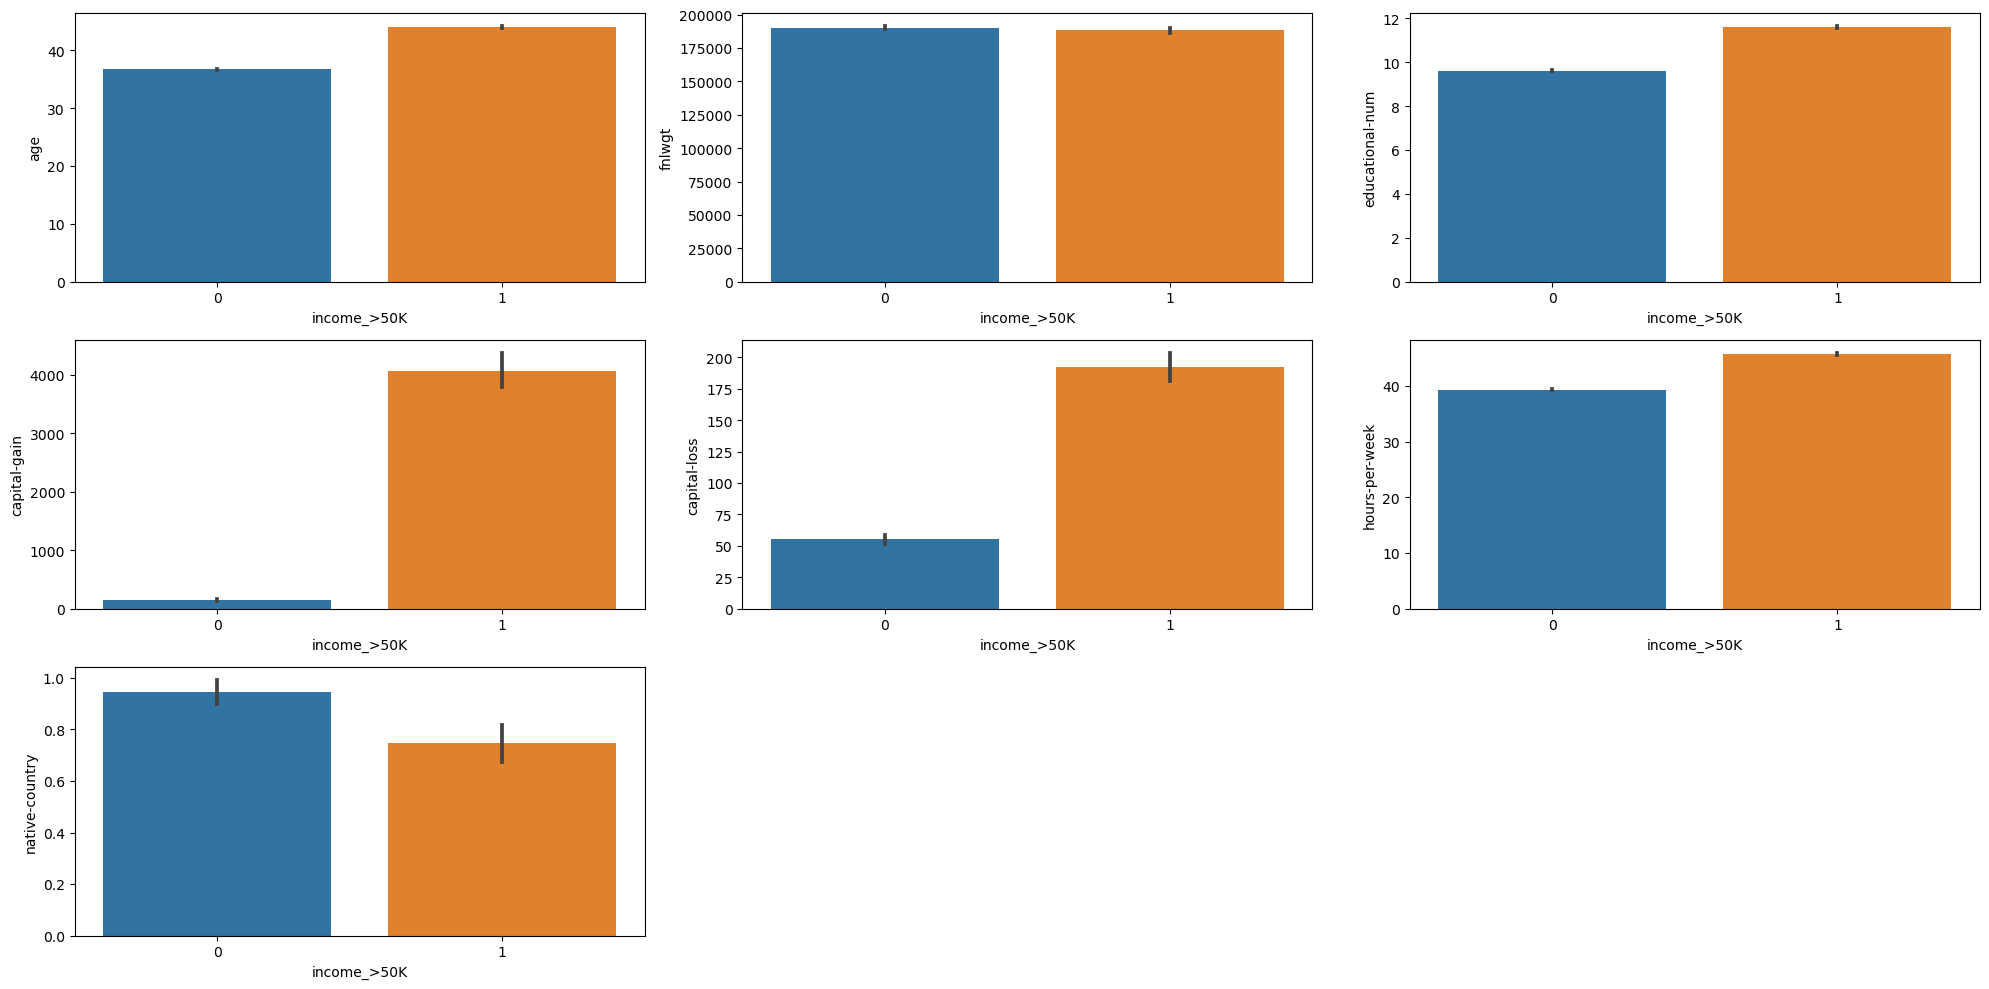

In [16]:
plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
sns.barplot(data=tr_data_c,x='income_>50K',y='age')
plt.subplot(3,3,2)
sns.barplot(data=tr_data_c,x='income_>50K',y='fnlwgt')
plt.subplot(3,3,3)
sns.barplot(data=tr_data_c,x='income_>50K',y='educational-num')
plt.subplot(3,3,4)
sns.barplot(data=tr_data_c,x='income_>50K',y='capital-gain')
plt.subplot(3,3,5)
sns.barplot(data=tr_data_c,x='income_>50K',y='capital-loss')
plt.subplot(3,3,6)
sns.barplot(data=tr_data_c,x='income_>50K',y='hours-per-week')
plt.subplot(3,3,7)
sns.barplot(data=tr_data_c,x='income_>50K',y='native-country')
plt.tight_layout()


> Insight
* Feature fnlwgt is same for income_>50K - true or false hence i won't help in prediction so we can drop this feature 

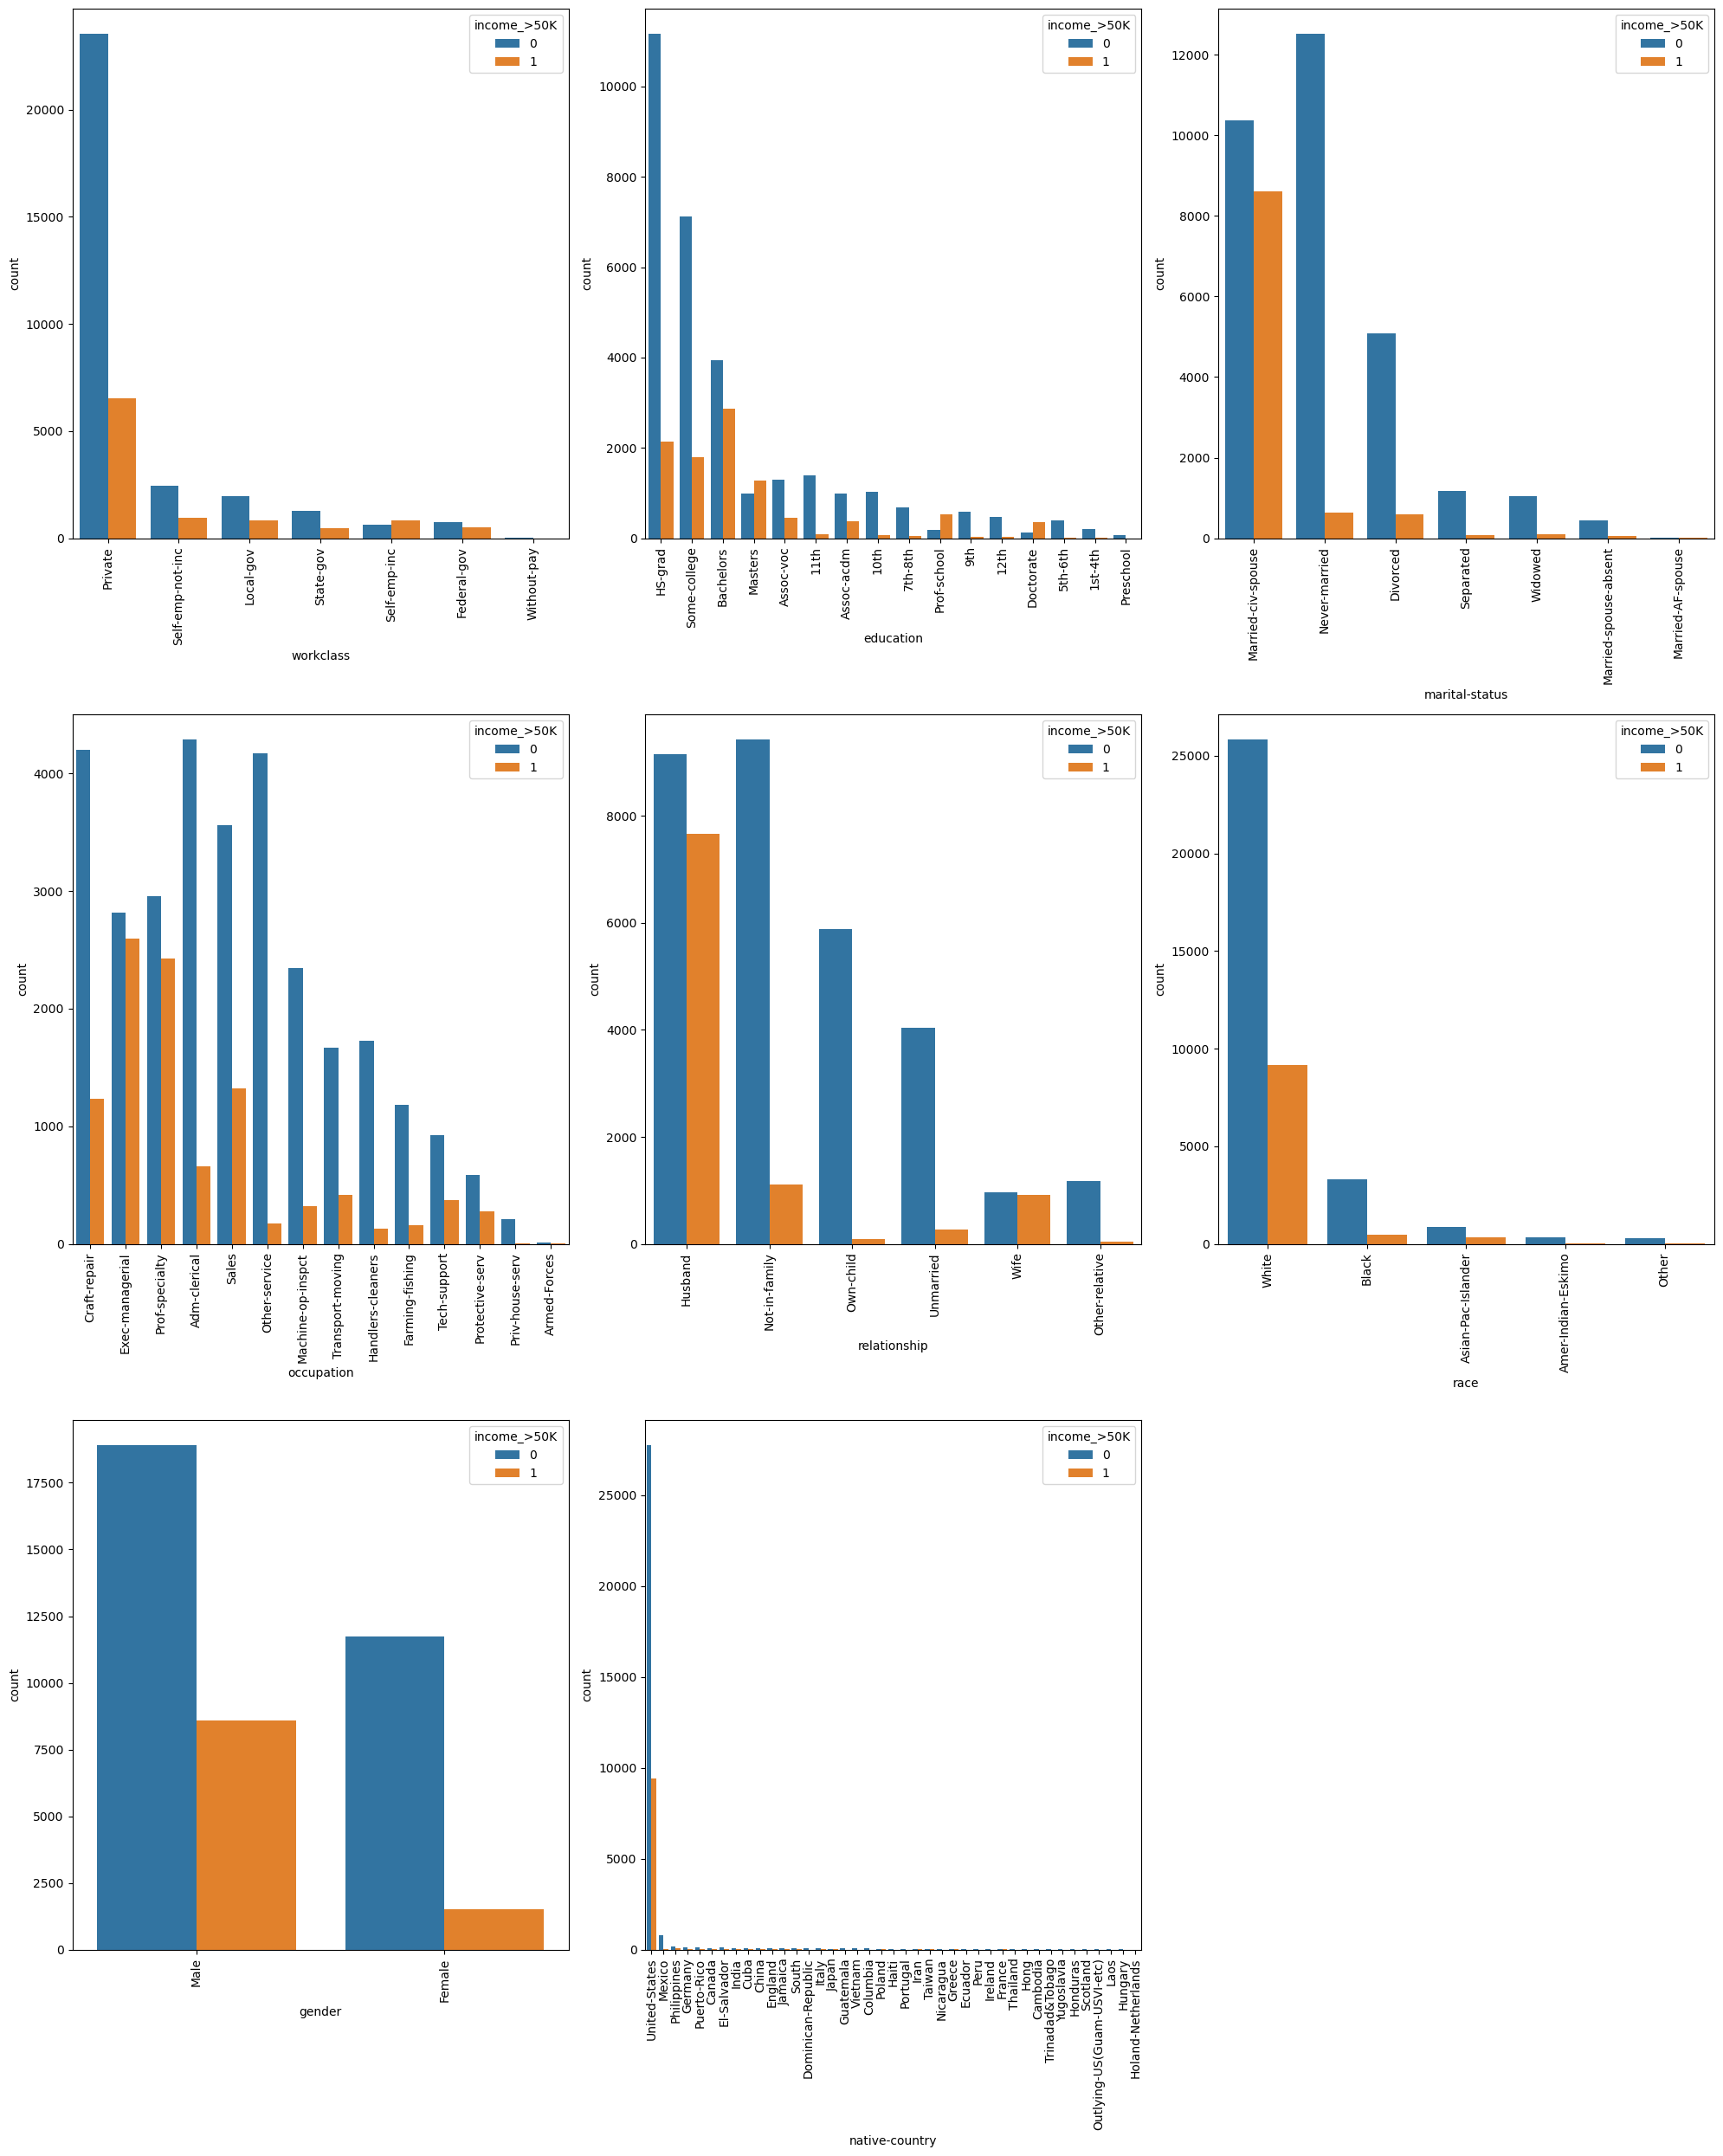

In [17]:
#Catalogircal feature = ['workclass','education','marital-status','occupation','relationship','race','gender','native-country']
plt.figure(figsize=(20,25))
plt.subplot(3,3,1)
fig1=sns.countplot(data=tr_data_c,x='workclass',hue='income_>50K')
fig1.set_xticklabels(workclass.keys(),rotation=90)
plt.subplot(3,3,2)
fig1=sns.countplot(data=tr_data_c,x='education',hue='income_>50K')
fig1.set_xticklabels(education.keys(),rotation=90)
plt.subplot(3,3,3)
fig1=sns.countplot(data=tr_data_c,x='marital-status',hue='income_>50K')
fig1.set_xticklabels(marital_status.keys(),rotation=90)
plt.subplot(3,3,4)
fig1=sns.countplot(data=tr_data_c,x='occupation',hue='income_>50K')
fig1.set_xticklabels(occupation.keys(),rotation=90)
plt.subplot(3,3,5)
fig1=sns.countplot(data=tr_data_c,x='relationship',hue='income_>50K')
fig1.set_xticklabels(relationship.keys(),rotation=90)
plt.subplot(3,3,6)
fig1=sns.countplot(data=tr_data_c,x='race',hue='income_>50K')
fig1.set_xticklabels(race.keys(),rotation=90)
plt.subplot(3,3,7)
fig1=sns.countplot(data=tr_data_c,x='gender',hue='income_>50K')
fig1.set_xticklabels(gender.keys(),rotation=90)
plt.subplot(3,3,8)
fig1=sns.countplot(data=tr_data_c,x='native-country',hue='income_>50K')
fig1.set_xticklabels(native_country.keys(),rotation=90)
plt.tight_layout()

> Insight
* Feature native-country only United States having impact on income_>50K

In [18]:
corr=tr_data_c.corr()
corr

age  workclass    fnlwgt  education  educational-num  \
age              1.000000   0.166642 -0.074977   0.073141         0.040758   
workclass        0.166642   1.000000 -0.034581   0.011917         0.171474   
fnlwgt          -0.074977  -0.034581  1.000000   0.034979        -0.044501   
education        0.073141   0.011917  0.034979   1.000000        -0.159700   
educational-num  0.040758   0.171474 -0.044501  -0.159700         1.000000   
marital-status   0.028950  -0.048846  0.006351  -0.011443        -0.096016   
occupation      -0.072032  -0.050312  0.009153   0.026147        -0.236734   
relationship    -0.222949  -0.075729  0.017649  -0.012450        -0.105788   
race            -0.032933   0.017591  0.004476   0.031810        -0.039980   
gender          -0.083496  -0.042011 -0.027718  -0.040584        -0.002349   
capital-gain     0.078740   0.055242 -0.003551   0.069265         0.128894   
capital-loss     0.059448   0.033277 -0.006859   0.020044         0.080995   
hours-per-week   0.101786   0.078574 -0.017080  -0.012169         0.148565   
native-country   0.008627  -0.022626  0.023131   0.082353        -0.036254   
income_>50K      0.237597   0.142305 -0.007457   0.043594         0.334432   

                 marital-status  occupation  relationship      race    gender  \
age                    0.028950   -0.072032     -0.222949 -0.032933 -0.083496   
workclass             -0.048846   -0.050312     -0.075729  0.017591 -0.042011   
fnlwgt                 0.006351    0.009153      0.017649  0.004476 -0.027718   
education             -0.011443    0.026147     -0.012450  0.031810 -0.040584   
educational-num       -0.096016   -0.236734     -0.105788 -0.039980 -0.002349   
marital-status         1.000000    0.055336      0.419579  0.067582  0.409941   
occupation             0.055336    1.000000      0.074000  0.040183  0.008912   
relationship           0.419579    0.074000      1.000000  0.114029  0.554922   
race                   0.067582    0.040183      0.114029  1.000000  0.065703   
gender                 0.409941    0.008912      0.554922  0.065703  1.000000   
capital-gain          -0.049789   -0.057513     -0.055616 -0.009164 -0.046206   
capital-loss          -0.048467   -0.037903     -0.053467 -0.019432 -0.044054   
hours-per-week        -0.145554   -0.066067     -0.238411 -0.034887 -0.230996   
native-country         0.016649    0.004881      0.040794  0.206579  0.002505   
income_>50K           -0.313454   -0.165132     -0.258550 -0.064133 -0.215658   

                 capital-gain  capital-loss  hours-per-week  native-country  \
age                  0.078740      0.059448        0.101786        0.008627   
workclass            0.055242      0.033277        0.078574       -0.022626   
fnlwgt              -0.003551     -0.006859       -0.017080        0.023131   
education            0.069265      0.020044       -0.012169        0.082353   
educational-num      0.128894      0.080995        0.148565       -0.036254   
marital-status      -0.049789     -0.048467       -0.145554        0.016649   
occupation          -0.057513     -0.037903       -0.066067        0.004881   
relationship        -0.055616     -0.053467       -0.238411        0.040794   
race                -0.009164     -0.019432       -0.034887        0.206579   
gender              -0.046206     -0.044054       -0.230996        0.002505   
capital-gain         1.000000     -0.032141        0.084661       -0.010442   
capital-loss        -0.032141      1.000000        0.054991       -0.005555   
hours-per-week       0.084661      0.054991        1.000000       -0.006137   
native-country      -0.010442     -0.005555       -0.006137        1.000000   
income_>50K          0.221671      0.145513        0.227918       -0.020721   

                 income_>50K  
age                 0.237597  
workclass           0.142305  
fnlwgt             -0.007457  
education           0.043594  
educational-num     0.334432  
marital-status     -0.313

<Axes: >

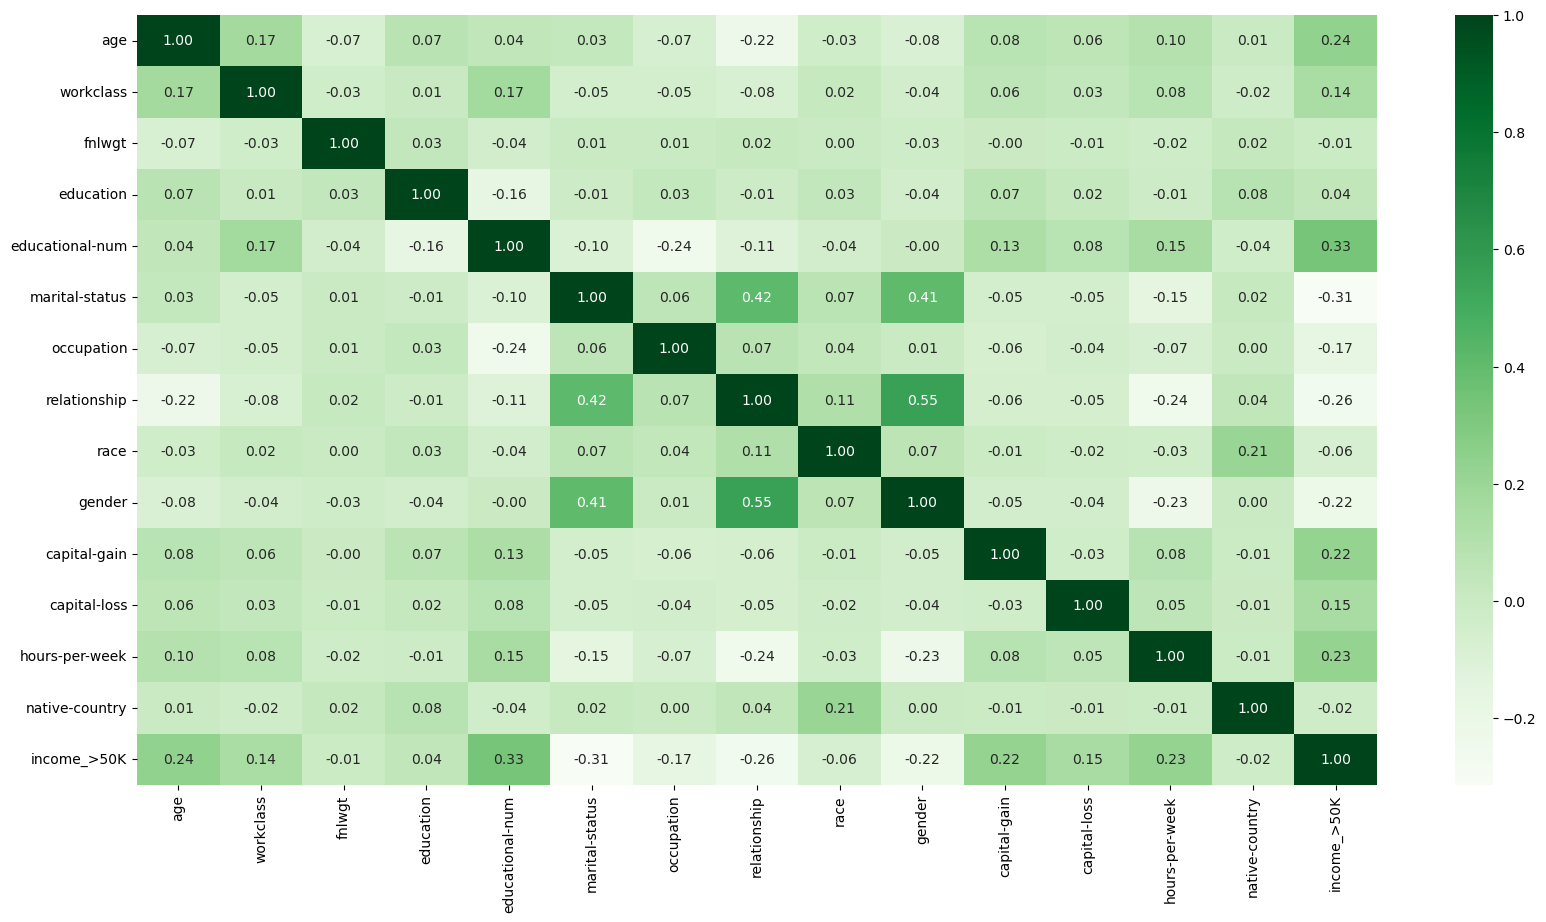

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,fmt='0.2f',cmap='Greens')

> Insight
* impacting feature - age,workclass,educational-num,relationship,race,gender,captital-gain,capital-loss,hours-per-week,native-country

# Model - Decision Tree Classification

In [20]:
#importing the necessary library for DecisionTree Classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report

In [21]:
#splitting input variable and target variable
X=tr_data_c.drop(['fnlwgt','income_>50K'],axis=1)
y=tr_data_c['income_>50K']

In [22]:
#splitting train and test size
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [23]:
#training the model
dtree=DecisionTreeClassifier(criterion="entropy")
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [24]:
#predicting the vale
y_pred=dtree.predict(X_test)

In [25]:
accuracy_score(y_test,y_pred)

0.8150421474752435

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      9192
           1       0.63      0.61      0.62      3027

    accuracy                           0.82     12219
   macro avg       0.75      0.75      0.75     12219
weighted avg       0.81      0.82      0.81     12219



#### Taking whole tr_data_c dataset for training and will use ts_data_c for test or predict the value.

In [27]:
ts_data_c=ts_data.copy()

In [28]:
#Data Wrangling 
#Catalogircal feature = ['workclass','education','marital-status','occupation','relationship','race','gender','native-country']
def transform_categorical_column(data,column):
    category=data[column].value_counts().index.to_list()
    map_cat={k:v for v,k in enumerate(category)}
    data[column]=data[column].map(map_cat)
    rev_map_cat={v:k for k,v in map_cat.items()}
    return data , map_cat ,rev_map_cat

In [29]:
ts_data_c,workclass,rev_workclass=transform_categorical_column(ts_data_c,'workclass')
ts_data_c,education,rev_education=transform_categorical_column(ts_data_c,'education')
ts_data_c,marital_status,rev_marital_status=transform_categorical_column(ts_data_c,'marital-status')
ts_data_c,occupation,rev_occupation=transform_categorical_column(ts_data_c,'occupation')
ts_data_c,relationship,rev_relationship=transform_categorical_column(ts_data_c,'relationship')
ts_data_c,race,rev_race=transform_categorical_column(ts_data_c,'race')
ts_data_c,gender,rev_gender=transform_categorical_column(ts_data_c,'gender')
ts_data_c,native_country,rev_native_countryr=transform_categorical_column(ts_data_c,'native-country')

In [30]:
X_train=tr_data_c.drop(['fnlwgt','income_>50K'],axis=1)
y_train=tr_data_c['income_>50K']
X_test=ts_data_c.drop('fnlwgt',axis=1)

In [31]:
#training the model
dtree=DecisionTreeClassifier(criterion="entropy")
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [32]:
#predicting the vale
y_pred=dtree.predict(X_test)

In [33]:
y_pred=pd.DataFrame(y_pred,columns=['income_>50K'])
y_pred.head(2)

income_>50K
0            0
1            0

In [34]:
y_pred.to_csv('mycsvfile.csv',index=False) # in CSV file first value is column name which is zero. 

# Thank you
Please upvotes if you find the notebook useful.